In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sp

In [2]:
def get_warp_factor_by_region(x_in, y_in, size_scale):
    # Create 2D grids of x and y values
    x, y = np.meshgrid(x_in, np.abs(y_in))
    
    # Initialize WFX and WFY as 2D arrays of zeros with the shape (len(x_in), len(y_in))
    WFX = np.zeros_like(x)
    WFY = np.zeros_like(y)
    
    # Create a mask of True values that will be used to track where conditions have not been applied
    mask = np.ones_like(x, dtype=bool)

    # Apply conditions in a mutually exclusive manner

    # Condition 1
    condition1 = (x >= size_scale) & (x <= 2 * size_scale) & (x - size_scale >= y)
    WFX = np.where(mask & condition1, -2, WFX)
    mask &= ~condition1  # Update mask to exclude elements where condition1 is True

    # Condition 2
    condition2 = (x > size_scale) & (x <= 2 * size_scale) & (x - size_scale <= y) & (-y + 3 * size_scale >= x)
    WFX = np.where(mask & condition2, -1, WFX)
    WFY = np.where(mask & condition2, 1, WFY)
    mask &= ~condition2  # Update mask to exclude elements where condition2 is True

    # Condition 3
    condition3 = (x > 0) & (x <= size_scale) & (x + size_scale > y) & (-y + size_scale < x)
    WFY = np.where(mask & condition3, 1, WFY)
    WFX = np.where(mask & condition3, 0, WFX)
    mask &= ~condition3  # Update mask to exclude elements where condition3 is True

    # Condition 4
    condition4 = (x > 0) & (x <= size_scale) & (x + size_scale <= y) & (-y + 3 * size_scale >= x)
    WFX = np.where(mask & condition4, -0.5, WFX)
    WFY = np.where(mask & condition4, 0.5, WFY)
    mask &= ~condition4  # Update mask to exclude elements where condition4 is True

    # Condition 5
    condition5 = (x > -size_scale) & (x <= 0) & (-x + size_scale < y) & (-y + 3 * size_scale >= -x)
    WFX = np.where(mask & condition5, 0.5, WFX)
    WFY = np.where(mask & condition5, 0.5, WFY)
    mask &= ~condition5  # Update mask to exclude elements where condition5 is True

    # Condition 6
    condition6 = (x > -size_scale) & (x <= 0) & (x + size_scale <= y) & (-y + size_scale >= x)
    WFX = np.where(mask & condition6, 1, WFX)
    WFY = np.where(mask & condition6, 0, WFY)
    mask &= ~condition6  # Update mask to exclude elements where condition6 is True

    # Condition 7
    condition7 = (x >= -size_scale) & (x <= size_scale) & (x + size_scale > y)
    WFX = np.where(mask & condition7, 1, WFX)
    WFY = np.where(mask & condition7, 0, WFY)
    mask &= ~condition7  # Update mask to exclude elements where condition7 is True

    # Apply sign of y_in to WFY
    x, y = np.meshgrid(x_in, y_in)
    WFY = -np.sign(y) * WFY

    return WFX, WFY


In [3]:
x_in=np.arange(-1000,1000,1)
y_in=np.arange(-1000,1000,1)

In [4]:
WFX, WFY=get_warp_factor_by_region(x_in,y_in,300)

In [5]:
WFX

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

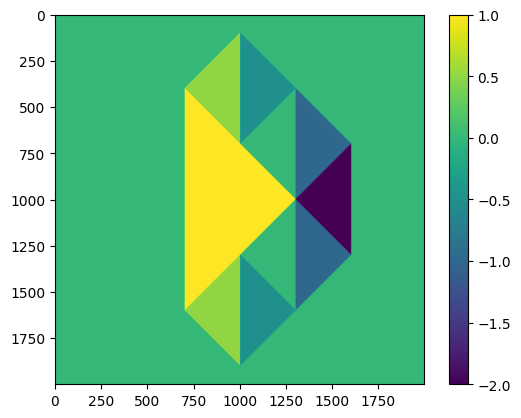

In [6]:
plt.imshow(WFX,cmap="viridis")
plt.colorbar()
plt.show()

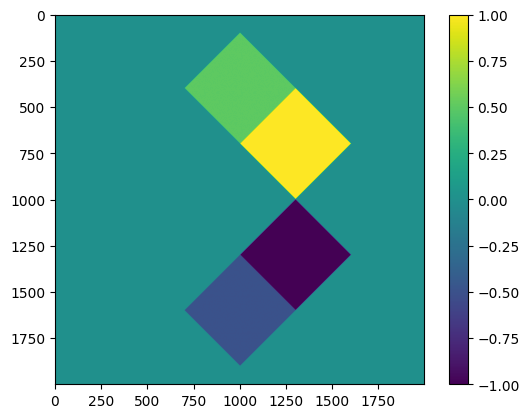

In [7]:
plt.imshow(WFY,cmap="viridis")
plt.colorbar()
plt.show()

In [8]:
dx=10
dy=10

xWFX, xWFY=get_warp_factor_by_region(x_in+dx,y_in,300)
yWFX, yWFY=get_warp_factor_by_region(x_in,y_in+dy,300)

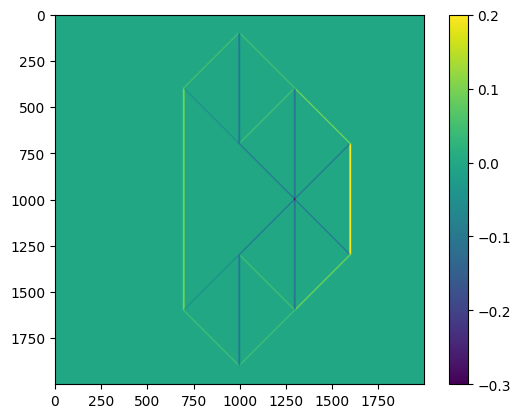

In [9]:
plt.imshow((xWFX-WFX)/dx,cmap="viridis")
plt.colorbar()
plt.show()

In [10]:
# Define symbolic variables
x, p, size_scale = sp.symbols('x p size_scale')

# Define conditions for WFX
WFX = sp.Piecewise(
    (-2, (x >= size_scale) & (x <= 2 * size_scale) & (x - size_scale >= sp.Abs(p))),
    (-1, (x > size_scale) & (x <= 2 * size_scale) & (x - size_scale <= sp.Abs(p)) & (-sp.Abs(p) + 3 * size_scale >= x)),
    (0, (x > 0) & (x <= size_scale) & (x + size_scale > sp.Abs(p)) & (-sp.Abs(p) + size_scale < x)),
    (-0.5, (x > 0) & (x <= size_scale) & (x + size_scale <= sp.Abs(p)) & (-sp.Abs(p) + 3 * size_scale >= x)),
    (0.5, (x > -size_scale) & (x <= 0) & (-x + size_scale < sp.Abs(p)) & (-sp.Abs(p) + 3 * size_scale >= -x)),
    (1, (x > -size_scale) & (x <= 0) & (x + size_scale <= sp.Abs(p)) & (-sp.Abs(p) + size_scale >= x)),
    (1, (x >= -size_scale) & (x <= size_scale) & (x + size_scale > sp.Abs(p))),
    (0, True)  # Default case
)

# Define conditions for WFY
WFY = sp.sign(p)*sp.Piecewise(
    (1, (x > size_scale) & (x <= 2 * size_scale) & (x - size_scale <= sp.Abs(p)) & (-sp.Abs(p) + 3 * size_scale >= x)),
    (1, (x > 0) & (x <= size_scale) & (x + size_scale > sp.Abs(p)) & (-sp.Abs(p) + size_scale < x)),
    (0.5, (x > 0) & (x <= size_scale) & (x + size_scale <= sp.Abs(p)) & (-sp.Abs(p) + 3 * size_scale >= x)),
    (0.5, (x > -size_scale) & (x <= 0) & (-x + size_scale < sp.Abs(p)) & (-sp.Abs(p) + 3 * size_scale >= -x)),
    (0, (x > -size_scale) & (x <= 0) & (x + size_scale <= sp.Abs(p)) & (-sp.Abs(p) + size_scale >= x)),
    (0, (x >= -size_scale) & (x <= size_scale) & (x + size_scale > sp.Abs(p))),
    (0, True)  # Apply sign of y_in to WFY
)



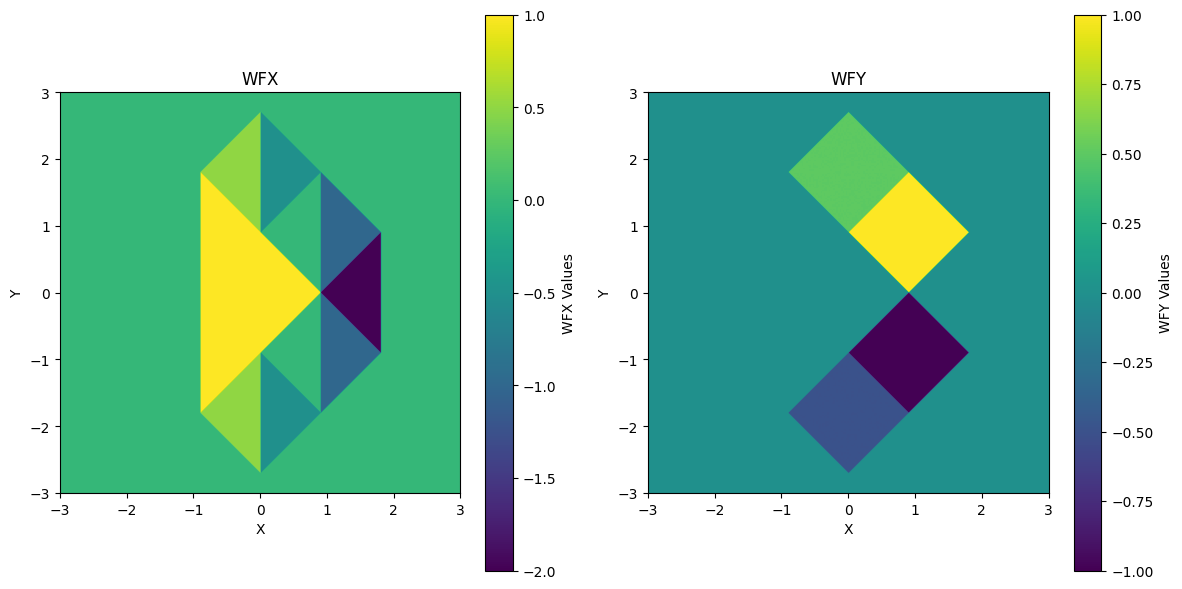

In [12]:
X, Y = np.meshgrid(x_in, y_in)

# Convert the SymPy functions to numerical functions
WFX_func = sp.lambdify((x, p, size_scale), WFX, modules='numpy')
WFY_func = sp.lambdify((x, p, size_scale), WFY, modules='numpy')

# Evaluate the functions on the grid
WFX_values = WFX_func(X, Y, 300)
WFY_values = WFY_func(X, Y, 300)

# Create subplots to visualize WFX and WFY
plt.figure(figsize=(12, 6))

# Plot WFX
plt.subplot(1, 2, 1)
plt.imshow(WFX_values, extent=(-3, 3, -3, 3), origin='lower', cmap='viridis')
plt.colorbar(label='WFX Values')
plt.title('WFX')
plt.xlabel('X')
plt.ylabel('Y')

# Plot WFY
plt.subplot(1, 2, 2)
plt.imshow(WFY_values, extent=(-3, 3, -3, 3), origin='lower', cmap='viridis')
plt.colorbar(label='WFY Values')
plt.title('WFY')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()